In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-01 20:58:44.590378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 20:58:44.590465: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 20:58:44.591240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-01 20:58:44.597060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-01 20:58:45.358872: W tensorflow/compiler/tf2

In [3]:
df = pd.read_csv('data/csgo_round_snapshots.csv')

In [4]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

ct_weapon_bizon
ct_weapon_g3sg1
t_weapon_m249
ct_weapon_negev
ct_weapon_r8revolver
ct_weapon_sawedoff

In [6]:
# df.drop(['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249', 'ct_weapon_negev', 'ct_weapon_r8revolver', 'ct_weapon_sawedoff'], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

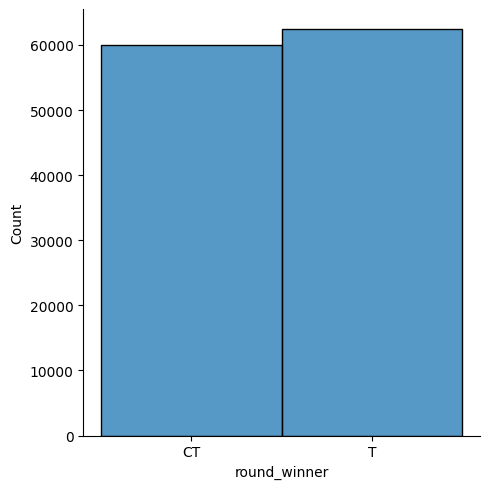

In [8]:
sns.displot(df['round_winner'])
plt.show()

In [10]:
from sklearn.preprocessing import OrdinalEncoder

encode_cols = ['map','round_winner', 'bomb_planted']

df[encode_cols] = OrdinalEncoder().fit_transform(df[encode_cols])

In [11]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1.0,0.0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1.0,0.0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1.0,0.0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1.0,0.0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1.0,0.0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  float64
 4   bomb_planted                  122410 non-null  float64
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [13]:
# from sklearn.preprocessing import OneHotEncoder
# 
# encode_cols = ['model', 'transmission', 'fuelType', 'Manufacturer']
# 
# enc = OneHotEncoder()
# 
# enc.fit(df[encode_cols])
# ohe = pd.DataFrame(enc.transform(df[encode_cols]).toarray(), columns=enc.get_feature_names_out(encode_cols))

In [14]:
# df = pd.concat([df, ohe], axis=1).drop(encode_cols, axis=1)

In [15]:
x = df.drop('round_winner', axis=1)
y = df['round_winner']

In [16]:
from sklearn.model_selection import train_test_split

x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=42)

In [17]:
df.shape

(122410, 97)

### finding the optimal learning rate

In [18]:
# def find_lr(model, x_train, y_train, x_valid, y_valid, init_lr=1e-5, final_lr=10.0, num_steps=100, loss_fn=tf.keras.losses.BinaryCrossentropy()):
#     losses = []
#     lrs = np.exp(np.linspace(np.log(init_lr), np.log(final_lr), num_steps))
#     optimizer = tf.keras.optimizers.Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#     
#     for lr in lrs:
#         optimizer.learning_rate = lr
#         model.compile(optimizer=optimizer, loss=loss_fn)
#         history = model.fit(x_train, y_train, epochs=1, validation_data=(x_valid, y_valid), verbose=0)
#         losses.append(history.history['loss'][0])
# 
#     return lrs, losses

### Hyperparameter-tuning

In [19]:
# Define the model builder function to create and evalute the model based on our input
def build_and_evaluate_model(n_neurons, n_layers, activation, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_norm=False):
    with tf.device('/GPU:0'):  # Explicitly run on GPU:0 if available for running speed
        model = tf.keras.models.Sequential()
        
        if batch_norm:
            model.add(tf.keras.layers.BatchNormalization())
            
        for _ in range(n_layers):
          model.add(tf.keras.layers.Dense(n_neurons, activation=activation))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,
            beta_2=0.999, epsilon=1e-8)
        model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), verbose=0)

        # Evaluate the model on the test set
        mae_test = model.evaluate(X_test, y_test, verbose=0)
    return history, mae_test


In [20]:
num_layers = [7, 8, 9, 10]
activations = ['relu']
num_neurons = [80, 90, 100, 110]

# define your Parameter grid that you want to experiment on
param_grid = {
    'n_neurons': num_neurons,
    'activation': activations,
    'n_layers': num_layers
}

# Manual exploration of parameter combinations
# Note: This may take sometimes even with a GPU
# fine-tunning
results = []
for n_neurons in param_grid['n_neurons']:
    for activation in param_grid['activation']:
        for n_layers in param_grid['n_layers']:
          # Build, evaluate the model, and store the result with the parameters
          history, mae_test = build_and_evaluate_model(n_neurons, n_layers, activation, x_train, y_train, x_valid, y_valid, x_test, y_test, batch_norm=True)
          results.append({
              'n_neurons': n_neurons,
              'n_layers': n_layers,
              'activation': activation,
              'mae_test': mae_test,
              'history': history,
          })

2024-05-01 20:59:33.220161: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:59:33.373651: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:59:33.373716: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:59:33.376110: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 20:59:33.376226: I external/local_xla/xla/stream_executor

KeyboardInterrupt: 

In [22]:
# Print all results
for result in sorted(results, key=lambda x:x['mae_test']):
    print(result)

{'n_neurons': 80, 'n_layers': 8, 'activation': 'relu', 'mae_test': [0.44807806611061096, 0.7845309376716614], 'history': <keras.src.callbacks.history.History object at 0x000001A0F6054970>}
{'n_neurons': 90, 'n_layers': 8, 'activation': 'relu', 'mae_test': [0.45520296692848206, 0.7830604910850525], 'history': <keras.src.callbacks.history.History object at 0x000001A0A7D81A60>}
{'n_neurons': 90, 'n_layers': 9, 'activation': 'relu', 'mae_test': [0.45679694414138794, 0.7816553711891174], 'history': <keras.src.callbacks.history.History object at 0x000001A09D881CA0>}
{'n_neurons': 110, 'n_layers': 8, 'activation': 'relu', 'mae_test': [0.45784589648246765, 0.7914583683013916], 'history': <keras.src.callbacks.history.History object at 0x000001A11B62DF70>}
{'n_neurons': 90, 'n_layers': 10, 'activation': 'relu', 'mae_test': [0.45849525928497314, 0.784367561340332], 'history': <keras.src.callbacks.history.History object at 0x000001A0B5DA0FA0>}
{'n_neurons': 110, 'n_layers': 9, 'activation': 'relu'

### Hyperparameter tuning N12

In [148]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=7, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=280)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    # exp_rate = hp.Float("exp_rate", min_value=0.8, max_value=0.9)
    #0.8 - 0.9
    # optimizer = hp.Choice("optimizer", values=["adam"])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9,
    beta_2=0.999, epsilon=1e-8)
    
    model = tf.keras.Sequential()
    # model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.BatchNormalization())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [149]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="trails_list", project_name="my_rnd_search", seed=42)
random_search_tuner.search(x_train, y_train, epochs=20,
                           validation_data=(x_valid, y_valid))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
5                 |5                 |n_hidden
26                |26                |n_neurons
0.00065625        |0.00065625        |learning_rate


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x177f103a0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Epoch 1/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 652us/step - accuracy: 0.7039 - loss: 0.5296 - val_accuracy: 0.7543 - val_loss: 0.4601
Epoch 2/20
 285/2152 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7458 - loss: 0.4768

KeyboardInterrupt: 

In [28]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

/Users/alialghamdi/Programming/pycharmProjects/deepLearning/.venv/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
/Users/alialghamdi/Programming/pycharmProjects/deepLearning/.venv/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [39]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 2, 'n_neurons': 230, 'learning_rate': 0.000505466655750672}

In [38]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 2
n_neurons: 230
learning_rate: 0.000505466655750672
Score: 0.8183600306510925


#### Hyperband architecture

In [108]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        return model.fit(X, y, **kwargs)

In [109]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=20, factor=3, hyperband_iterations=2,
    overwrite=True, directory="trails_list", project_name="hyperband")

In [32]:
hyperband_tuner.search(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Trial 60 Complete [00h 00m 44s]
val_accuracy: 0.7904322147369385

Best val_accuracy So Far: 0.8235883712768555
Total elapsed time: 00h 18m 03s


In [43]:
best_trial = hyperband_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 0016 summary
Hyperparameters:
n_hidden: 2
n_neurons: 230
learning_rate: 0.000505466655750672
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.8235883712768555


In [42]:
top3_params = hyperband_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 2,
 'n_neurons': 230,
 'learning_rate': 0.000505466655750672,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

#### Bayesian 

In [110]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="trails_list", project_name="bayesian_opt")

bayesian_opt_tuner.search(x_train, y_train, epochs=20,
                          validation_data=(x_valid, y_valid))

Trial 10 Complete [00h 01m 31s]
val_accuracy: 0.7923057079315186

Best val_accuracy So Far: 0.7937870621681213
Total elapsed time: 00h 06m 54s


In [88]:
best_trial = bayesian_opt_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 2
n_neurons: 251
learning_rate: 0.000505466655750672
Score: 0.7899965047836304


### Neural Network architecture

In [19]:
# norm = tf.keras.layers.Normalization()
# norm.input_shape=x_train.shape[1:]
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,
beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# norm.adapt(x_train)

In [157]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(251, activation="relu"),
    tf.keras.layers.Dense(251, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
optimizer = tf.keras.optimizers.Adam(learning_rate=5.05466655750670e-4,  beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [158]:
model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7319 - loss: 0.4931 - val_accuracy: 0.7615 - val_loss: 0.4498
Epoch 2/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7606 - loss: 0.4524 - val_accuracy: 0.7672 - val_loss: 0.4453
Epoch 3/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7733 - loss: 0.4365 - val_accuracy: 0.7706 - val_loss: 0.4443
Epoch 4/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7865 - loss: 0.4197 - val_accuracy: 0.7734 - val_loss: 0.4457
Epoch 5/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8013 - loss: 0.4009 - val_accuracy: 0.7761 - val_loss: 0.4477
Epoch 6/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8149 - loss: 0.3809 - val_accuracy: 0.7780 - val_loss: 0.4535
Epoch 7/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8282 - loss: 0.3602 - val_accuracy: 0.7798 - val_loss: 0.4622
Epoch 8/20
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8426 - loss: 0.3389 - 

### Testing step and checking the overfitting

In [153]:
model.evaluate(x_test, y_test)

957/957 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7845 - loss: 0.7324


[0.7543948292732239, 0.7849884033203125]

7 layers(100) with batch -> acc = 0.765, loss = 0.71

8 layers(80) with batch -> acc = 0.784, loss = 0.448

Trial 1 summary  random search
Hyperparameters:
n_hidden: 2
n_neurons: 230
learning_rate: 0.000505466655750672
Score: 0.8183600306510925


Trial 0016 summary   hypermodel
Hyperparameters:
n_hidden: 2
n_neurons: 230
learning_rate: 0.000505466655750672
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0012
Score: 0.8235883712768555

Trial 01 summary
Hyperparameters:
n_hidden: 2
n_neurons: 251
learning_rate: 5.05466655750670e-4
Score: 0.8267253637313843

In [154]:
model.evaluate(x_train, y_train)

2152/2152 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8633 - loss: 0.4003


[0.3955214023590088, 0.8634521961212158]